In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [0]:
!pip install scikit-plot

In [0]:
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys 
import os 
prefix = '/content/gdrive/My Drive/'
customized_path_to_your_homework = 'AML_Final_Project' 
sys_path = os.path.join(prefix, customized_path_to_your_homework) 
sys.path.append(sys_path)



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# import pandas as pd
# data = pd.read("/content/gdrive/My Drive/AML_Final_Project/CK+48")
import os,cv2
data_path = '/content/gdrive/My Drive/AML_Final_Project/CK+48'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape


Loaded the images of dataset-happy

Loaded the images of dataset-sadness

Loaded the images of dataset-fear

Loaded the images of dataset-disgust

Loaded the images of dataset-anger

Loaded the images of dataset-contempt

Loaded the images of dataset-surprise



(991, 48, 48, 3)

In [0]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [0]:
from sklearn.utils import shuffle
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test=X_test

In [0]:
input_shape=(48,48,3)

model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [43]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)         

True

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import callbacks

filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [0]:
hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Epoch 1/50
121/121 [==============================] - 1s 6ms/step - loss: 1.8686 - accuracy: 0.2518 - val_loss: 1.7391 - val_accuracy: 0.4631
Epoch 2/50
121/121 [==============================] - 0s 3ms/step - loss: 1.4652 - accuracy: 0.4774 - val_loss: 1.0015 - val_accuracy: 0.7047
Epoch 3/50
121/121 [==============================] - 0s 3ms/step - loss: 1.1265 - accuracy: 0.5891 - val_loss: 0.8607 - val_accuracy: 0.7383
Epoch 4/50
121/121 [==============================] - 0s 4ms/step - loss: 0.9381 - accuracy: 0.6675 - val_loss: 0.8094 - val_accuracy: 0.7450
Epoch 5/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8117 - accuracy: 0.6853 - val_loss: 0.5788 - val_accuracy: 0.7584
Epoch 6/50
121/121 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.7352 - val_loss: 0.5158 - val_accuracy: 0.8389
Epoch 7/50
121/121 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.7553 - val_loss: 0.4710 - val_accuracy: 0.8188
Epoch 

Test Loss: 0.21930845081806183
Test accuracy: 0.9597315192222595
(1, 48, 48, 3)
[[9.9983323e-01 2.1561955e-05 1.4517245e-04 1.5185129e-11 8.1917505e-15
  1.3639885e-10 3.7388993e-08]]
[0]
[[1. 0. 0. 0. 0. 0. 0.]]


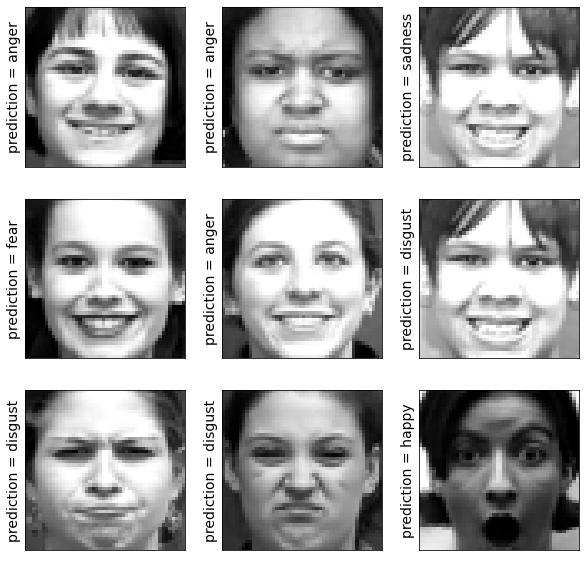

In [0]:
import matplotlib.pyplot as plt
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[9:18])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()

<Figure size 432x288 with 0 Axes>

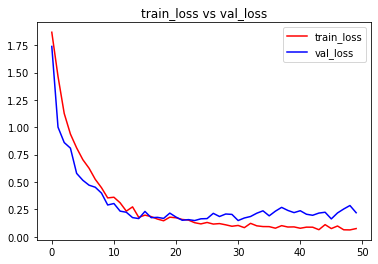

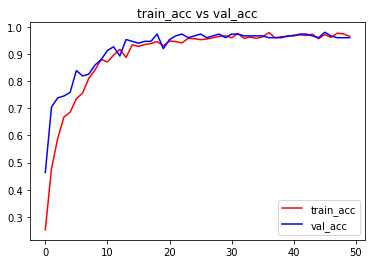

<Figure size 432x288 with 0 Axes>

In [0]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

total wrong validation predictions: 6


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.67      1.00      0.80         6
           2       0.96      1.00      0.98        27
           3       1.00      0.80      0.89        10
           4       0.97      0.97      0.97        33
           5       0.90      1.00      0.95         9
           6       1.00      0.95      0.97        40

    accuracy                           0.96       149
   macro avg       0.93      0.95      0.93       149
weighted avg       0.97      0.96      0.96       149



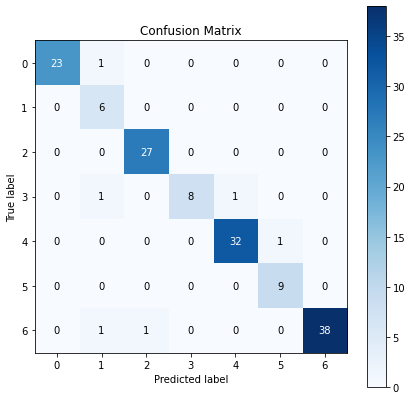

In [0]:
yhat_valid = model.predict_classes(X_test)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))